## Polynomial Example 2

- Ok, so we have this long-running polynomial example throughout the video
- The sample and data and orders etc don't have to be exaclty the same throughout, but it would be nice if they were
- Let me first see if the same samples etc can make the points/plots I need in each section, if that works great, if not I want to go ahead and make the needed adjustments before getting into manim land
- Bias/varaince section at the end might be a little extra tricky!
- Ah yep I think i want to try the new numpy API?

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython import display
import pandas as pd
from matplotlib import cm
from numpy.polynomial import Legendre, Polynomial
import scipy.special

# def fit_legendre_pinv(x_train, y_train, degree, x_min=-2, x_max=2):
#     """Fit Legendre polynomial using pseudoinverse"""
#     # Rescale x to [-1, 1]
#     x_scaled = 2 * (x_train - x_min) / (x_max - x_min) - 1
    
#     feature_degrees = np.arange(degree + 1)[:, None]
#     X_train_poly = scipy.special.eval_legendre(feature_degrees, x_scaled).T
#     beta_hat = np.linalg.pinv(X_train_poly) @ y_train
#     return beta_hat

# def eval_legendre_poly(beta, x, degree, x_min=-2, x_max=2):
#     """Evaluate Legendre polynomial with given coefficients"""
#     # Rescale x to [-1, 1]
#     x_scaled = 2 * (x - x_min) / (x_max - x_min) - 1
    
#     feature_degrees = np.arange(degree + 1)[:, None]
#     X_poly = scipy.special.eval_legendre(feature_degrees, x_scaled).T
#     return X_poly @ beta

In [2]:
random_seed=428
n_points=10
noise_level=0.2

In [3]:
def f(x): return 1.0*(x**2)
# def f(x): return 0.5*(x**4-3*x**2) #This this for a minute. 
    
# def f(x): return np.add(2.0 * x, np.cos(x * 25)) #[:, 0]


def get_noisy_data(n_points=10, noise_level=0.2, random_seed=428):
    np.random.seed(random_seed) 
    x=np.random.uniform(-1, 1, n_points)
    y=f(x)+noise_level*np.random.randn(n_points)
    return x,y

all_x = np.linspace(-1, 1, 128)
all_y = f(all_x)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
x,y=get_noisy_data(n_points, noise_level, random_seed)
                   
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

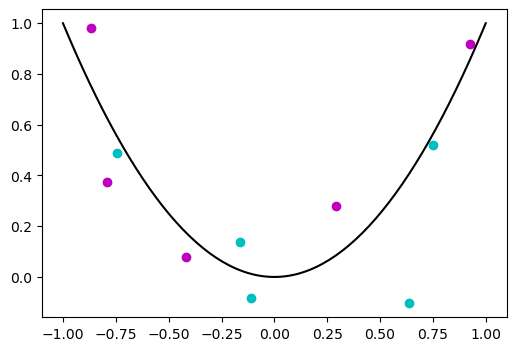

In [4]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
# plt.ylim([-0.5, 2])

/opt/anaconda3/lib/python3.11/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


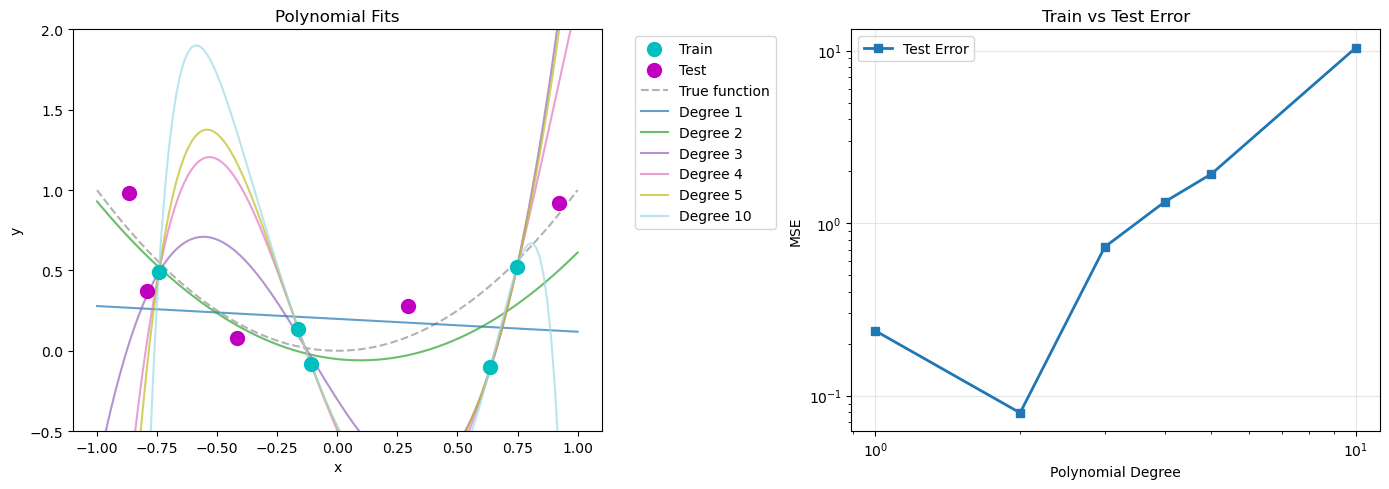

Degree   1: Train MSE = 0.070401, Test MSE = 0.237379
Degree   2: Train MSE = 0.031825, Test MSE = 0.079449
Degree   3: Train MSE = 0.000803, Test MSE = 0.727023
Degree   4: Train MSE = 0.000000, Test MSE = 1.328535
Degree   5: Train MSE = 0.000000, Test MSE = 1.926010
Degree  10: Train MSE = 0.000000, Test MSE = 10.409571


In [8]:
degrees = [1, 2, 3, 4, 5, 10] # 6, 7, 8, 9, 10] #6, 7, 8, 10, 20, 30, 50, 100]
train_errors = []
test_errors = []

# Get colormap
colors = cm.tab20(np.linspace(0, 1, len(degrees)))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot: fits
ax1.scatter(x_train, y_train, c='c', s=100, label='Train', zorder=10)
ax1.scatter(x_test, y_test, c='m', s=100, label='Test', zorder=10)
ax1.plot(all_x, all_y, 'k--', alpha=0.3, label='True function')

for i, degree in enumerate(degrees):
    # Fit polynomial
    # beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    # all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    poly = Polynomial.fit(x_train, y_train, degree)
    
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    all_y_fit = poly(all_x)

    # Plot fit
    ax1.plot(all_x, all_y_fit, color=colors[i], label=f'Degree {degree}', alpha=0.7)
    
    # Calculate errors
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - y_test_pred)**2)
    train_errors.append(train_error)
    test_errors.append(test_error)

ax1.set_ylim([-0.5, 2])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Polynomial Fits')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Right subplot: errors
# ax2.plot(degrees, train_errors, 'o-', label='Train Error', linewidth=2)
ax2.plot(degrees, test_errors, 's-', label='Test Error', linewidth=2)
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('MSE')
ax2.set_title('Train vs Test Error')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print errors
for degree, train_err, test_err in zip(degrees, train_errors, test_errors):
    print(f"Degree {degree:3d}: Train MSE = {train_err:.6f}, Test MSE = {test_err:.6f}")

In [10]:
test_errors

[0.8375205216534359,
 1.1380188526307893,
 1.5565169124910863,
 27.924770646242496,
 24.23963354805951,
 0.40354706589325584]

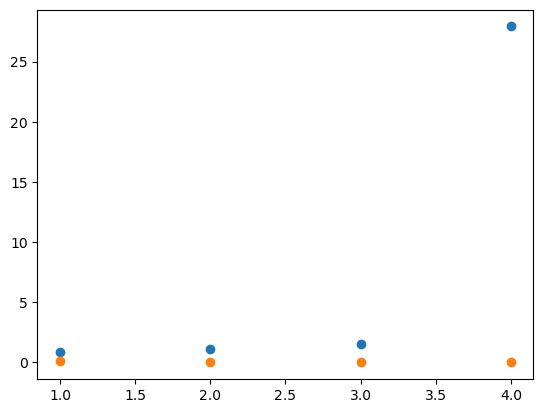

In [11]:
plt.scatter(degrees[:4], test_errors[:4])
plt.scatter(degrees[:4], train_errors[:4])

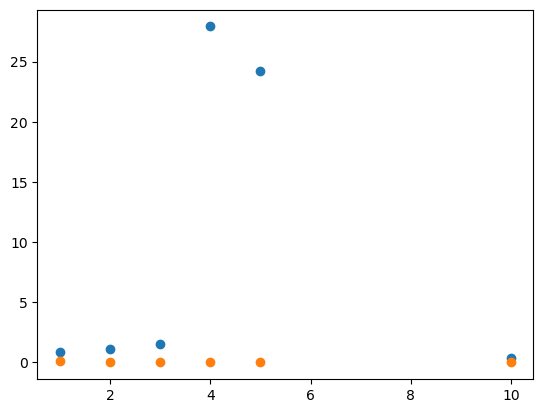

In [12]:
plt.scatter(degrees, test_errors)
plt.scatter(degrees, train_errors)

## Bias Variance Computation
- Ok there's some important middle details to fill in, but bias/variance calculation is the sketchiest thing right now I think
- Let me get a bit deeper into this
- yeah let me see what the key parts of p66-p68 look like

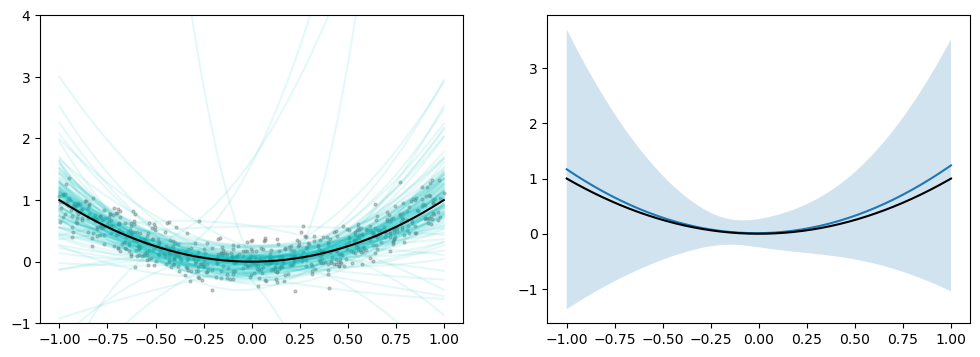

In [10]:
degree=2
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)

    # beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    # all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    
    poly = Polynomial.fit(x_train, y_train, degree)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    all_y_fit = poly(all_x)
    
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

fig=plt.figure(0, (6, 4))
plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)

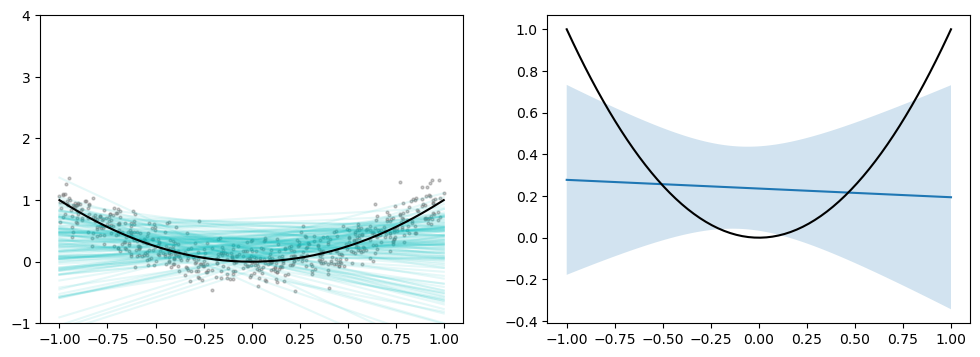

In [11]:
degree=1
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)

    poly = Polynomial.fit(x_train, y_train, degree)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    all_y_fit = poly(all_x)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)

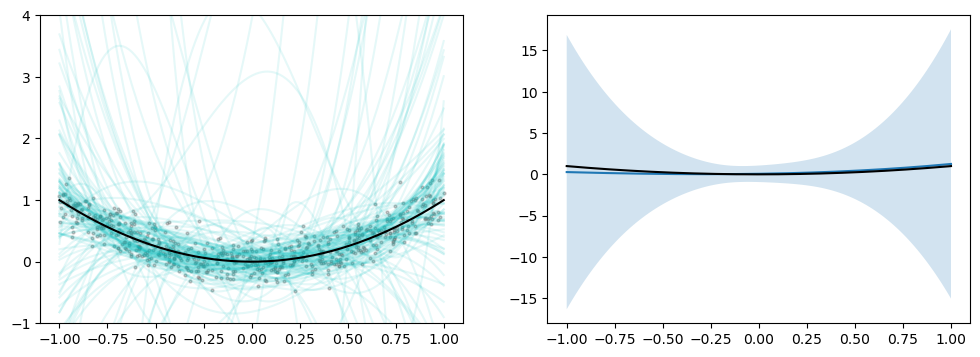

In [12]:
degree=3
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)
    
    poly = Polynomial.fit(x_train, y_train, degree)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    all_y_fit = poly(all_x)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)

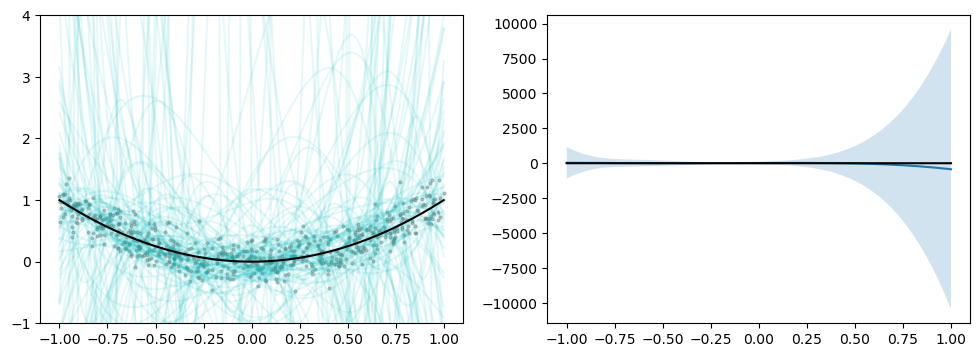

In [13]:
degree=4
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)
    
    poly = Polynomial.fit(x_train, y_train, degree)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    all_y_fit = poly(all_x)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)

(-1.0, 3.0)

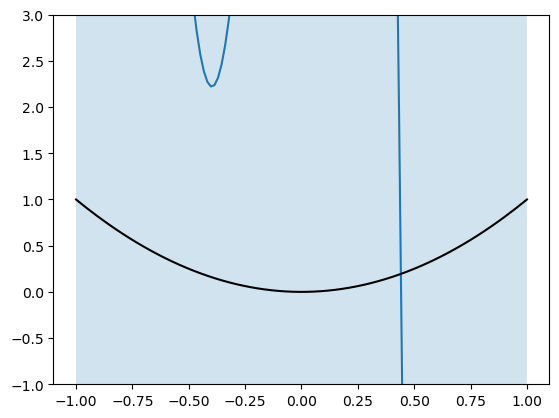

In [14]:
plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)
plt.ylim([-1, 3])

---

In [16]:
# noise_level=0.3
# n_points=100


# degree=2

# x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
# x_train, y_train=x[:n_train_points], y[:n_train_points]
# x_test, y_test=x[n_train_points:], y[n_train_points:]

# beta_hat = fit_legendre_pinv(x_train, y_train, degree)

# all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
# y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
# y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)

# plt.plot(all_x, all_y, c='k')
# plt.scatter(x_train, y_train, c='c')
# plt.scatter(x_test, y_test, c='m')
# plt.plot(all_x, all_y_fit, c='c')

# train_error = np.mean((y_train - y_train_pred)**2)
# test_error = np.mean((y_test - y_test_pred)**2)
# function_error = np.mean((all_y-all_y_fit)**2)

In [19]:
train_error, test_error, function_error

(0.2870112445522242, 1.6022285954647462, 1.6808609593431934)

In [18]:
# #Setup here for a single example to sanity check, then iterate through below. 
# noise_level=0.3
# n_points=100



# degree=2
# fits=[]
# y_trains=[]; x_trains=[]
# for i in range(128):
#     x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
#     x_train, y_train=x[:n_train_points], y[:n_train_points]
#     x_test, y_test=x[n_train_points:], y[n_train_points:]
#     x_trains.append(x_train); y_trains.append(y_train)

#     beta_hat = fit_legendre_pinv(x_train, y_train, degree)
#     all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
#     y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
#     y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)

#     fits.append(all_y_fit)
# fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

# fig=plt.figure(0, (12, 4))
# ax=fig.add_subplot(1,2,1)
# plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
# plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
# plt.plot(all_x, all_y, c='k')
# plt.ylim([-1, 4])

# ax=fig.add_subplot(1,2,2)
# mean_fit=np.mean(fits, 0)
# std_fit=np.std(fits, 0)

# plt.plot(all_x, mean_fit)
# plt.plot(all_x, all_y, c='k')
# plt.fill_between(all_x, 
#                  mean_fit - std_fit, 
#                  mean_fit + std_fit, 
#                  alpha=0.2)

100%|██████████████████████████████████████| 49/49 [00:22<00:00,  2.16it/s]


<Figure size 640x480 with 0 Axes>

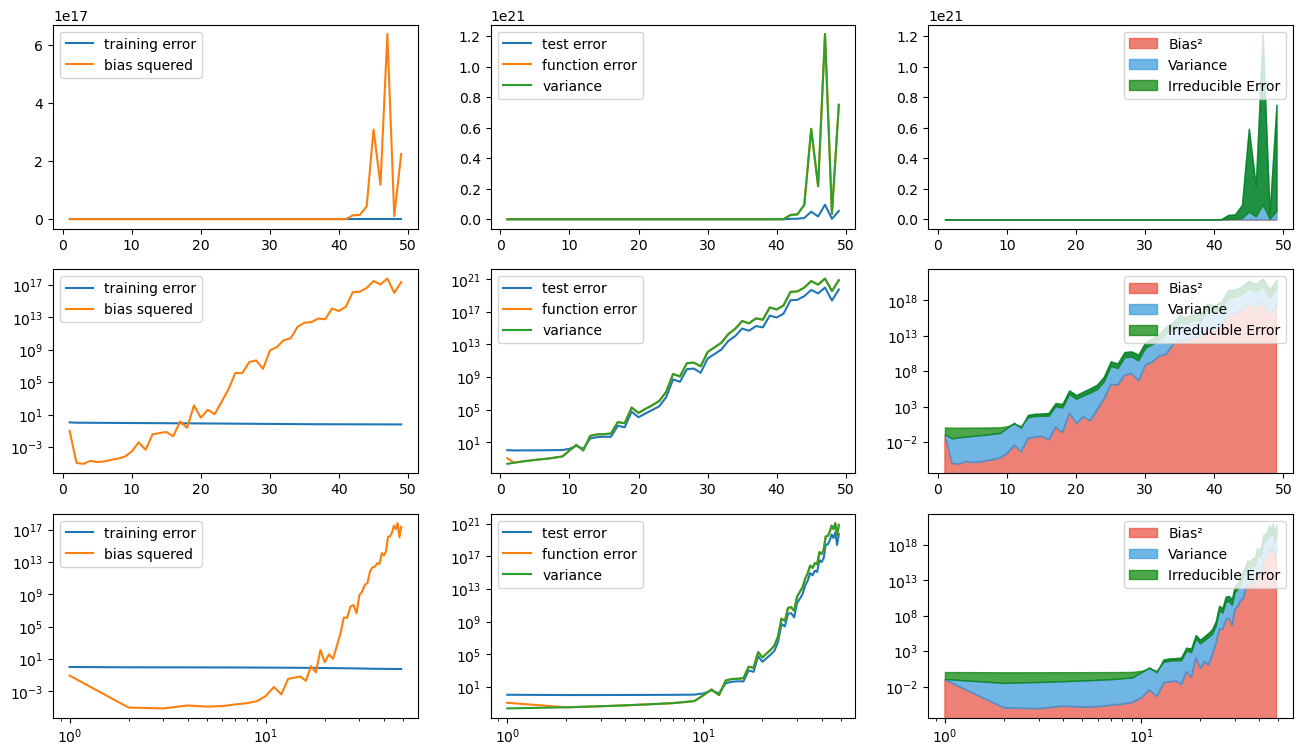

In [19]:
save_dir='/Users/stephen/Stephencwelch Dropbox/welch_labs/double_descent/hackin/bias_variance_curves_5'

#Once I have a nice vis approach, premute and viz these I think!
for noise_level in [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]:
    for n_points in [8, 10, 12, 14, 16, 20, 30, 40, 50, 60, 100, 200]:

# n_points=100
        n_random_samples=2000
        degrees=np.arange(1, 50)
        
        biases=[]
        variances=[]
        average_train_error=[]
        average_test_error=[]
        average_function_error=[]
        for degree in tqdm(degrees):
            n_train_points=int(np.floor(n_points*0.5))
            n_test_points=n_points-n_train_points
            
            fits=[]
            train_errors=[]
            test_errors=[]
            function_errors=[]
            for i in range(n_random_samples):
                x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
                x_train, y_train=x[:n_train_points], y[:n_train_points]
                x_test, y_test=x[n_train_points:], y[n_train_points:]
            
                # beta_hat = fit_legendre_pinv(x_train, y_train, degree)
                # all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
                # y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
                # y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)
                
                poly = Polynomial.fit(x_train, y_train, degree)
                y_train_pred = poly(x_train)
                y_test_pred = poly(x_test)
                all_y_fit = poly(all_x)

                
                train_error = np.mean((y_train - y_train_pred)**2)
                test_error = np.mean((y_test - y_test_pred)**2)
                function_error = np.mean((all_y-all_y_fit)**2)
                        
                fits.append(all_y_fit)
                train_errors.append(train_error)
                test_errors.append(test_error)
                function_errors.append(function_error)
                
            fits=np.array(fits)
            
            mean_fit=np.mean(fits, 0)
            bias=np.mean((all_y-mean_fit)**2)
            variance=np.mean((fits-mean_fit)**2) 
            # print(degree, bias, variance)
            average_train_error.append(np.mean(train_errors))
            average_test_error.append(np.mean(test_errors))
            average_function_error.append(np.mean(function_errors))
        
            biases.append(bias)
            variances.append(variance)
            
        biases=np.array(biases)
        variances=np.array(variances)
        average_function_error=np.array(average_function_error)
        
        plt.clf()
        fig=plt.figure(0, (16, 9))
        fig.add_subplot(3,3,1)
        plt.plot(degrees, average_train_error)
        plt.plot(degrees, biases)
        plt.legend(['training error', 'bias squered'])
        
        fig.add_subplot(3,3,2)
        plt.plot(degrees, average_test_error)
        plt.plot(degrees, average_function_error)
        plt.plot(degrees, variances)
        plt.legend(['test error', 'function error', 'variance'])
        
        ax3=fig.add_subplot(3,3,3)
        irreducible_error = average_test_error - (biases + variances)
        ax3.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
        ax3.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
        ax3.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                         label='Irreducible Error', color='green')
        ax3.legend(loc='upper right')
        
        ax4=fig.add_subplot(3,3,4)
        ax4.plot(degrees, average_train_error)
        ax4.plot(degrees, biases)
        ax4.legend(['training error', 'bias squered'])
        ax4.set_yscale('log')
        
        ax5=fig.add_subplot(3,3,5)
        ax5.plot(degrees, average_test_error)
        ax5.plot(degrees, average_function_error)
        ax5.plot(degrees, variances)
        ax5.legend(['test error', 'function error', 'variance'])
        ax5.set_yscale('log')
        
        ax6=fig.add_subplot(3,3,6)
        ax6.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
        ax6.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
        ax6.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                         label='Irreducible Error', color='green')
        ax6.set_yscale('log')
        ax6.legend(loc='upper right')
        
        ax7=fig.add_subplot(3,3,7)
        ax7.plot(degrees, average_train_error)
        ax7.plot(degrees, biases)
        ax7.legend(['training error', 'bias squered'])
        ax7.set_yscale('log')
        ax7.set_xscale('log')
        
        ax8=fig.add_subplot(3,3,8)
        ax8.plot(degrees, average_test_error)
        ax8.plot(degrees, average_function_error)
        ax8.plot(degrees, variances)
        ax8.legend(['test error', 'function error', 'variance'])
        ax8.set_yscale('log')
        ax8.set_xscale('log')
        
        
        ax9=fig.add_subplot(3,3,9)
        ax9.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
        ax9.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
        ax9.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                         label='Irreducible Error', color='green')
        ax9.set_yscale('log')
        ax9.legend(loc='upper right')
        ax9.set_xscale('log')

        plt.savefig(save_dir+'/n_points_'+str(n_points)+'_noise_level_'+str(noise_level)+'.png')

In [ ]:
#Once I have a nice vis approach, premute and viz these I think!
noise_level=1.0
n_points=100
n_random_samples=128
degrees=np.arange(1, 100)

biases=[]
variances=[]
average_train_error=[]
average_test_error=[]
average_function_error=[]
for degree in tqdm(degrees):
    n_train_points=int(np.floor(n_points*0.5))
    n_test_points=n_points-n_train_points
    
    fits=[]
    train_errors=[]
    test_errors=[]
    function_errors=[]
    for i in range(n_random_samples):
        x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
        x_train, y_train=x[:n_train_points], y[:n_train_points]
        x_test, y_test=x[n_train_points:], y[n_train_points:]
    
        beta_hat = fit_legendre_pinv(x_train, y_train, degree)
        all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
        y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
        y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)

        train_error = np.mean((y_train - y_train_pred)**2)
        test_error = np.mean((y_test - y_test_pred)**2)
        function_error = np.mean((all_y-all_y_fit)**2)
                
        fits.append(all_y_fit)
        train_errors.append(train_error)
        test_errors.append(test_error)
        function_errors.append(function_error)
        
    fits=np.array(fits)
    
    mean_fit=np.mean(fits, 0)
    bias=np.mean((all_y-mean_fit)**2)
    variance=np.mean((fits-mean_fit)**2) 
    # print(degree, bias, variance)
    average_train_error.append(np.mean(train_errors))
    average_test_error.append(np.mean(test_errors))
    average_function_error.append(np.mean(function_errors))

    biases.append(bias)
    variances.append(variance)
    
biases=np.array(biases)
variances=np.array(variances)
average_function_error=np.array(average_function_error)

plt.clf()
fig=plt.figure(0, (16, 9))
fig.add_subplot(3,3,1)
plt.plot(degrees, average_train_error)
plt.plot(degrees, biases)
plt.legend(['training error', 'bias squered'])

fig.add_subplot(3,3,2)
plt.plot(degrees, average_test_error)
plt.plot(degrees, average_function_error)
plt.plot(degrees, variances)
plt.legend(['test error', 'function error', 'variance'])

ax3=fig.add_subplot(3,3,3)
irreducible_error = average_test_error - (biases + variances)
ax3.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax3.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax3.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax3.legend(loc='upper right')

ax4=fig.add_subplot(3,3,4)
ax4.plot(degrees, average_train_error)
ax4.plot(degrees, biases)
ax4.legend(['training error', 'bias squered'])
ax4.set_yscale('log')

ax5=fig.add_subplot(3,3,5)
ax5.plot(degrees, average_test_error)
ax5.plot(degrees, average_function_error)
ax5.plot(degrees, variances)
ax5.legend(['test error', 'function error', 'variance'])
ax5.set_yscale('log')

ax6=fig.add_subplot(3,3,6)
ax6.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax6.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax6.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax6.set_yscale('log')
ax6.legend(loc='upper right')

ax7=fig.add_subplot(3,3,7)
ax7.plot(degrees, average_train_error)
ax7.plot(degrees, biases)
ax7.legend(['training error', 'bias squered'])
ax7.set_yscale('log')
ax7.set_xscale('log')

ax8=fig.add_subplot(3,3,8)
ax8.plot(degrees, average_test_error)
ax8.plot(degrees, average_function_error)
ax8.plot(degrees, variances)
ax8.legend(['test error', 'function error', 'variance'])
ax8.set_yscale('log')
ax8.set_xscale('log')


ax9=fig.add_subplot(3,3,9)
ax9.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax9.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax9.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax9.set_yscale('log')
ax9.legend(loc='upper right')
ax9.set_xscale('log')

In [ ]:
fig=plt.figure(0, (16, 9))
fig.add_subplot(3,3,1)
plt.plot(degrees, average_train_error)
plt.plot(degrees, biases)
plt.legend(['training error', 'bias squered'])

fig.add_subplot(3,3,2)
plt.plot(degrees, average_test_error)
plt.plot(degrees, average_function_error)
plt.plot(degrees, variances)
plt.legend(['test error', 'function error', 'variance'])

ax3=fig.add_subplot(3,3,3)
irreducible_error = average_test_error - (biases + variances)
ax3.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax3.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax3.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax3.legend(loc='upper right')

ax4=fig.add_subplot(3,3,4)
ax4.plot(degrees, average_train_error)
ax4.plot(degrees, biases)
ax4.legend(['training error', 'bias squered'])
ax4.set_yscale('log')

ax5=fig.add_subplot(3,3,5)
ax5.plot(degrees, average_test_error)
ax5.plot(degrees, average_function_error)
ax5.plot(degrees, variances)
ax5.legend(['test error', 'function error', 'variance'])
ax5.set_yscale('log')

ax6=fig.add_subplot(3,3,6)
ax6.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax6.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax6.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax6.set_yscale('log')
ax6.legend(loc='upper right')

ax7=fig.add_subplot(3,3,7)
ax7.plot(degrees, average_train_error)
ax7.plot(degrees, biases)
ax7.legend(['training error', 'bias squered'])
ax7.set_yscale('log')
ax7.set_xscale('log')

ax8=fig.add_subplot(3,3,8)
ax8.plot(degrees, average_test_error)
ax8.plot(degrees, average_function_error)
ax8.plot(degrees, variances)
ax8.legend(['test error', 'function error', 'variance'])
ax8.set_yscale('log')
ax8.set_xscale('log')


ax9=fig.add_subplot(3,3,9)
ax9.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax9.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax9.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax9.set_yscale('log')
ax9.legend(loc='upper right')
ax9.set_xscale('log')

- Ok this is tricky and hurting my head, but I do think this is a good thing to sort out first
- So the really powerful plot I would like to show here is:
- Real test error as a function of degree
- Compute bias as a shaded region
- Computed variance as a shaded region
- Irreucible error as a shaded region
- All of this across the interpolation treshold
- Clear bias/variance tradeoff in the classical region
- Bias and variance trending together after we hit interpolation threshold -> assuming this keeps happening
- This plot is kinda the final payoff of the video -> so if it's possible, it would be dope
- I think it's going to require more data points, which is fine!
- If I can get a nice final plot, I can decide how far I want to carry it forward -> like if i want to use the same exact data in the into, don't have to, I'll make a call after i figure this out
- Should consider log plots on one or both axes!
- And I trimmed plot like rylan does.
- Ok one more option too, i might get cleaner results if I meaasure not test set error, but the error betwee the fit and the underlying function at all points, ya know?

- Ok interesting, Rylan is not using noise at all it looks like, and comparing underlying functions got it!